# TP n° 2



# Le modèle de Lotka-Volterra

L'objectif de cette partie est d'étudier numériquement le modèle de Lotka-Volterra et d'illustrer le paradoxe observé par d'Anconna (voir la fiche de cours n°1).

On se donne donc deux populations $H(t)$ de sardines (les proies) et $P(t)$ de requins (les prédateurs) au temps $t,$ dont l'évolution au cours du temps suit la loi :

\begin{equation*}
     \begin{cases}
    H'(t) = H(t)(a - b P(t)) \\
    P'(t) = P(t)(-c  + d H(t)),
     \end{cases}
\end{equation*}

où $a,b,c,d >0$.

On suppose connues les populations de sardines et de requins à l'instant initial $t_0=0$ :

\begin{equation*}
     \begin{cases}
    H(0) = H_0, \\
    P(0) = P_0
     \end{cases}
\end{equation*}
où $H_0\ge 0$ et $P_0\ge 0$ sont donnés.

Pour toutes les applications numériques, on choisit : $a=0,1$, $b=d=5\cdot 10^{-5},$ $c=0,04$. On choisit une population initiale de $H_0=2000$ sardines et $P_0=1000$ requins.

#### QUESTION 1

Interpréter le modèle et notamment le signe devant chaque terme.

a=taux de reproduction des proies (constant, indépendant du nombre de prédateurs)

b=taux de mortalité des proies dû aux prédateurs rencontrés

c=taux de mortalité des prédateurs (constant, indépendant du nombre de proies)

d=taux de reproduction des prédateurs en fonction des proies rencontrées et mangées

Le signe negatif devant les termes : b, c est dû à la diminution d'une espece, impacte d'une population sur une autre
(car le terme represente le tot de mortalité, un terme qui fait décroitre la fonction)
 

#### QUESTION 2
En posant $Y = (H,P)$, réécrire le système
sous la forme $X' = F(X)$ où $F=(F_1,F_2)$ avec $F_1,F_2$ deux fonctions définies sur $R^2$ à valeurs dans $R$.

le nouveau système : 
    x' = F1(x) = ax-bxy et 
    y' = F2(y) = -cy+dxy
            autrement dit,
    x' = x(a-by) et 
    y' = y(-c+dx)

#### QUESTION 3

Représentez dans l'espace des phases $(H,P)$ le champ de vecteur associé à ce système d'équations. Que pouvez-vous intuiter sur l'allure des solutions ?

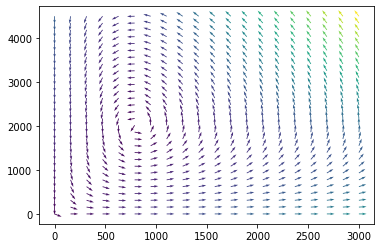

In [14]:
# COMPLETER LE CODE SUIVANT

import numpy as np
import matplotlib.pyplot as plt          # librairie graphique

# Paramètres
a=0.1
b=d=5e-5
c=0.04


def F1(x,y):
    return x*(a- b*y)

def F2(x,y):
    return y*(-c + d*x)

    
x, y = np.meshgrid(np.linspace(0.1 , 3000, 20),np.linspace(0.1,4500, 30))
n=np.sqrt(F1(x,y)**2+F2(x,y)**2)  
plt.quiver(x,y,F1(x,y)/n,F2(x,y)/n,n)
plt.axis()
plt.show()

### Résolution numérique

On s'intéresse dans cette partie à l'approximation numérique de la solution du système de Lotka-Volterra dans un intervalle de temps de la forme $[0,T]$. On pourra prendre $T=200$ ans.

On va résoudre ce problème de Cauchy grâce à la fonction 'odeint' vue au TP précédent. 
On se donne un pas $\Delta t=\frac{T}{N}>0,$ où $N$ est un entier non nul, et on considère une subdivision uniforme de pas $\Delta t$ de l'intervalle $[0, T],$ définie par les $(N+1)$ points  

$$
t_0=0,\ t_1:=\Delta t,\ \cdots,\ t_N:=N\Delta t=T, 
$$

et on note note $H^n$ (resp. $P^n$) la valeur approchée de $H(t_n)$ (resp. $P(t_n)$) à l'instant $t_n$ pour $n=0,\cdots,N$. 

#### QUESTION 4

Afin d'appliquer la méthode 'odeint' à la résolution du problème de Cauchy qui nous intéresse, définir la fonction second membre (attention à l'ordre des arguments) :

$$ F(t,X) = (F_1(X), F_2(X))^t,$$

où $X=(x,y)^t \in R^2$.

Construire le vecteur $t = (t^0,\ldots,t^N)$ des temps discrets où la solution approchée sera calculée.

Construire la solution approchée à l'aide de la fonction `odeint`.

In [29]:
from scipy.integrate import odeint
# Paramètres
H0=2000
P0=1000
T = 500
dt = 0.01
N = int(T/dt)

def F(X,t):
    return np.array([(a-b*X[1])*X[0],(-c+d*X[0])*X[1]])
y0=np.array([H0,P0])
t = np.linspace(0,T,N+1)
sol=odeint(F,y0,t)

#### QUESTION 5

Tracer dans la même figure les solutions approchées $[H_0,H_1,\ldots,H_N]$ et $[P_0,P_1,\ldots,P_N]$ en fonction du temps obtenues pour $\Delta t=0.01$. Rajouter des légendes et des titres à votre figure.

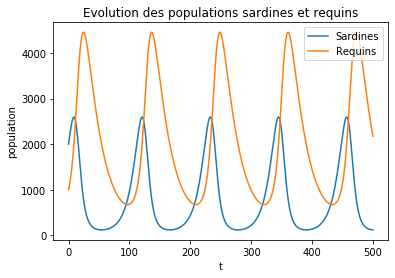

In [37]:
plt.plot(t,sol[:,0].T, label='Sardines')
plt.plot(t,sol[:,1].T, label='Requins')

plt.title('Evolution des populations sardines et requins')
plt.xlabel('t')
plt.ylabel('population')
plt.legend();
plt.show()


#### QUESTION 6

Créer une seconde figure et tracer sur cette figure $P$ en fonction de $H$ dans le plan $(H,P)$ (portrait de phase). Superposer cette représentation à la figure de la question 3.

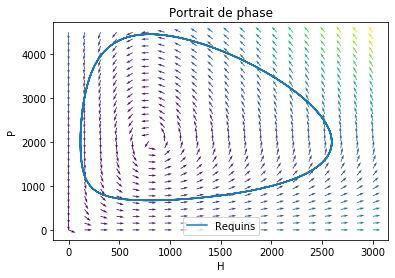

In [31]:
plt.plot(sol[:,0].T,sol[:,1].T,label='Requins')

x, y = np.meshgrid(np.linspace(0.1 , 3000, 20),np.linspace(0.1,4500, 30))
n=np.sqrt(F1(x,y)**2+F2(x,y)**2)  
plt.quiver(x,y,F1(x,y)/n,F2(x,y)/n,n)
plt.title('Portrait de phase')

plt.xlabel('H')
plt.ylabel('P')
plt.legend()
plt.show()

#### QUESTION 7

Commenter ces deux graphiques : expliquer clairement ce qui selon vous justifie les variations de chacune des espèces. 
La dependance des deux populations l'une de l'autre fait en sorte d'avoir des oscillation au tour du point d'equilibre

##  L'impact de la pêche

Nous pêchons maintenant une même proportion $p$ de requins et de sardines ce qui se traduit par l'ajout de deux termes négatifs $-pH(t)$ et $-pP(t)$ dans les équations. Le modèle devient
\begin{equation*}
     \begin{cases}
        H'(t)&=(a-p)H(t)-bH(t)P(t),\\
        P'(t)&=(-c-p)P(t)+dH(t)P(t).
     \end{cases}
\end{equation*}

On choisit $p=0.03$.

#### QUESTION 8

Reprendre chacune des questions précédentes pour ce nouveau modèle. Visualiser la solution pour différentes valeurs de p.

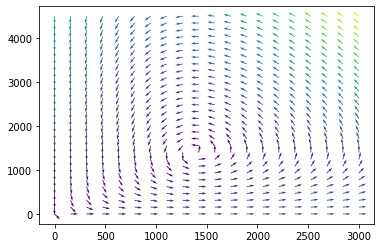

In [32]:
import numpy as np
import matplotlib.pyplot as plt          # librairie graphique

# Paramètres
a=0.1
b=d=5e-5
c=0.04
p=0.03

def FP1(x,y):
    return (a-p)*x - b*x*y

def FP2(x,y):
    return (-c-p)*y + d*x*y

    
x, y = np.meshgrid(np.linspace(0.1 , 3000, 20),np.linspace(0.1,4500, 30))
n=np.sqrt(FP1(x,y)**2+FP2(x,y)**2)  

plt.quiver(x,y,FP1(x,y)/n,FP2(x,y)/n,n)
plt.axis()
plt.show()

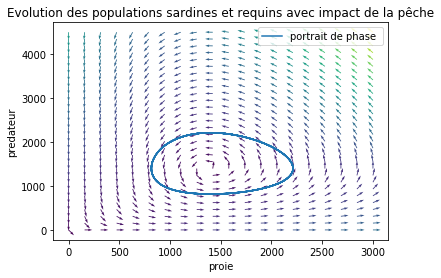

In [35]:
from scipy.integrate import odeint
# Paramètres
a=0.1
b=d=5e-5
c=0.04
T = 500
dt = 0.01
p = 0.03
N = int(T/dt)
def FP(X,t):
    return np.array([(a-p)*X[0] - b*X[0]*X[1] , (-c-p)*X[1]+d*X[0]*X[1]])

y0=np.array([H0,P0])
t = np.linspace(0,T,N+1)
solP=odeint(FP,y0,t)

plt.plot(solP[:,0],solP[:,1], label='portrait de phase ');
plt.quiver(x,y,FP1(x,y)/n,FP2(x,y)/n,n)
plt.title('Evolution des populations sardines et requins avec impact de la pêche');
plt.xlabel('proie')
plt.ylabel('predateur')
plt.legend()
plt.show()


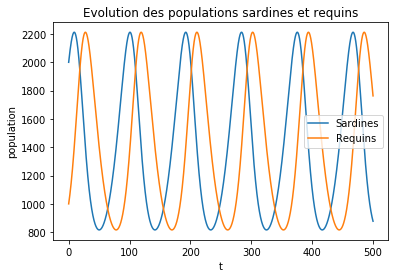

In [38]:
plt.plot(t,solP[:,0].T, label='Sardines')
plt.plot(t,solP[:,1].T, label='Requins')

plt.title('Evolution des populations sardines et requins')
plt.xlabel('t')
plt.ylabel('population')
plt.legend();
plt.show()


#### QUESTION 9

Expliquer quel est l'impact de la pêche sur l'évolution des populations.



Le point d'equilibre (stabilité) se deplace

#### QUESTION 10

Quelle espèce est favorisée par la pêche? 

Les sardines